In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [11]:
train_df = pd.read_csv('/TaxiFare.csv')
test_df = pd.read_csv('/TaxiFare.csv')

In [3]:
train_df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [4]:
test_df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [5]:
train_df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [6]:
test_df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [7]:
train_df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
test_df.isnull().sum().sort_values(ascending = False)

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [13]:
a = train_df[train_df["longitude_of_dropoff"].isnull()|train_df["latitude_of_dropoff"].isnull()]
print(a)

Empty DataFrame
Columns: [unique_id, amount, date_time_of_pickup, longitude_of_pickup, latitude_of_pickup, longitude_of_dropoff, latitude_of_dropoff, no_of_passenger]
Index: []


In [14]:
train_df.drop(a.index,axis = 0, inplace = True)

In [15]:
train_df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [16]:
train_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [17]:
test_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


<Axes: xlabel='amount', ylabel='Count'>

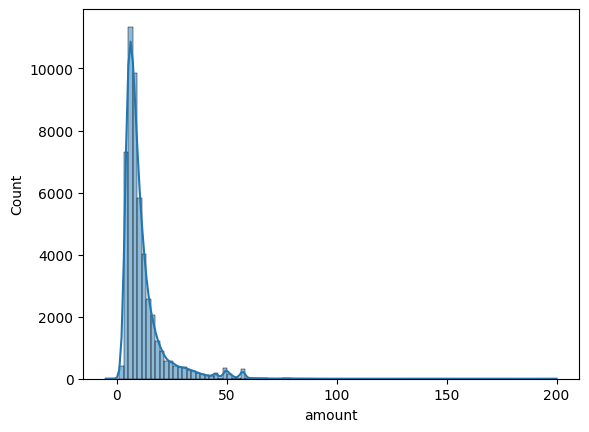

In [20]:
sns.histplot(
data = train_df, x = 'amount', kde = True, bins = 100)

<Axes: ylabel='amount'>

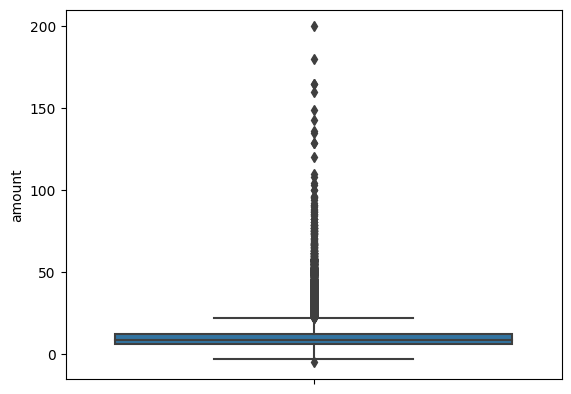

In [21]:
sns.boxplot(
data = train_df, y = 'amount')

In [22]:
train_df['no_of_passenger'].describe()

count    50000.000000
mean         1.667840
std          1.289195
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

(0.0, 1000000.0)

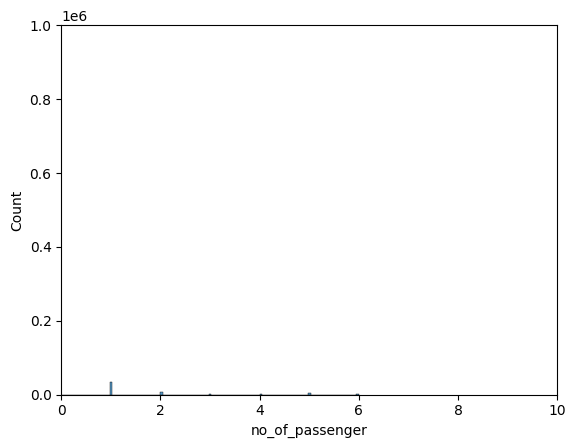

In [23]:
sns.histplot(
data = train_df, x = 'no_of_passenger')
plt.xlim(0,10)
plt.ylim(0,1000000)

In [24]:
train_df = train_df[(train_df['amount'] >= 2.5) & (train_df['amount'] < 100)]

In [25]:

train_df['amount'].describe()

count    49972.000000
mean        11.322157
std          9.380253
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max         96.250000
Name: amount, dtype: float64

(0.0, 150000.0)

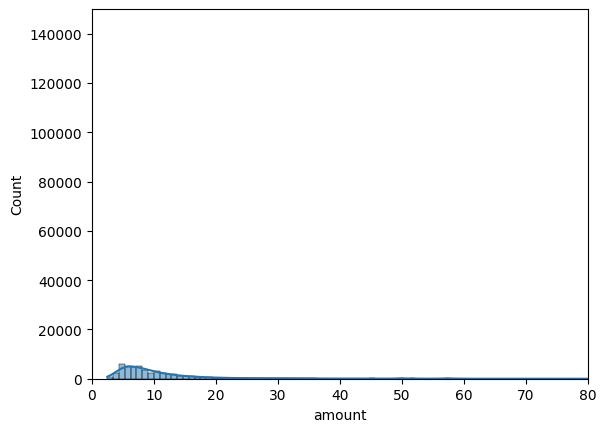

In [26]:
sns.histplot(
data = train_df, x = 'amount', kde = True, bins = 100 )
plt.xlim(0,80)
plt.ylim(0,150000)

<Axes: ylabel='amount'>

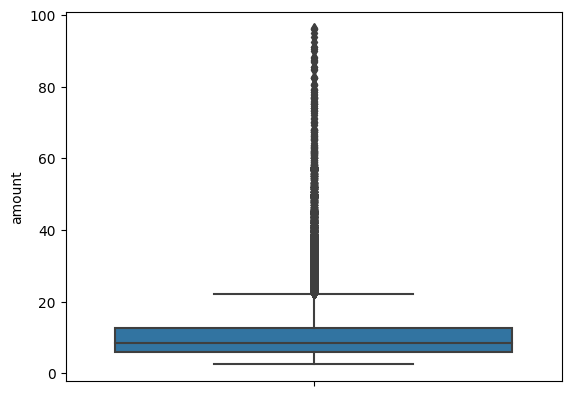

In [27]:
sns.boxplot(
data = train_df, y = 'amount')

(0.0, 1000000.0)

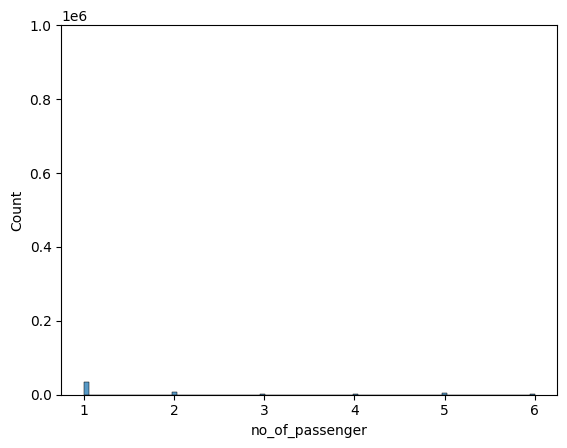

In [28]:
train_df = train_df[(train_df['no_of_passenger'] <= 6) & (train_df['no_of_passenger'] >= 1)]
sns.histplot(
data = train_df, x = 'no_of_passenger')
plt.ylim(0,1000000)

In [30]:
train_df = train_df[(train_df['longitude_of_pickup'] <= -73.0) & (train_df['longitude_of_pickup'] >= -74.5)]
train_df = train_df[(train_df['latitude_of_pickup'] >= 40.5) & (train_df['latitude_of_pickup'] <= 42)]
train_df = train_df[(train_df['longitude_of_dropoff'] <= -73.0) & (train_df['longitude_of_dropoff'] >= -74.5)]
train_df = train_df[(train_df['latitude_of_dropoff'] >= 40.5) & (train_df['latitude_of_dropoff'] <= 42)]

In [31]:
train_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,48758.000000,48758.000000,48758.000000,48758.000000,48758.000000,48758.000000
mean,11.325278,-73.975165,40.751176,-73.974033,40.751619,1.674720
std,9.372296,0.038488,0.030104,0.037444,0.032759,1.288795
min,2.500000,-74.438233,40.522263,-74.308235,40.529306,1.000000
25%,6.000000,-73.992303,40.736531,-73.991331,40.735937,1.000000
50%,8.500000,-73.982125,40.753454,-73.980492,40.754130,1.000000
75%,12.500000,-73.968400,40.767771,-73.965353,40.768474,2.000000
max,96.250000,-73.137393,41.650000,-73.137393,41.543217,6.000000


In [32]:
train_df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [33]:
train_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,48758.000000,48758.000000,48758.000000,48758.000000,48758.000000,48758.000000
mean,11.325278,-73.975165,40.751176,-73.974033,40.751619,1.674720
std,9.372296,0.038488,0.030104,0.037444,0.032759,1.288795
min,2.500000,-74.438233,40.522263,-74.308235,40.529306,1.000000
25%,6.000000,-73.992303,40.736531,-73.991331,40.735937,1.000000
50%,8.500000,-73.982125,40.753454,-73.980492,40.754130,1.000000
75%,12.500000,-73.968400,40.767771,-73.965353,40.768474,2.000000
max,96.250000,-73.137393,41.650000,-73.137393,41.543217,6.000000


<Axes: xlabel='no_of_passenger', ylabel='amount'>

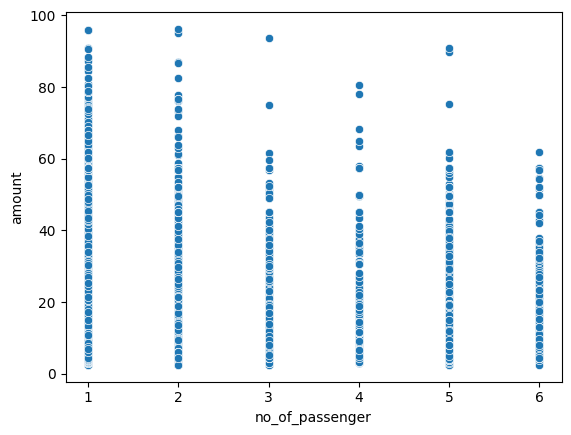

In [34]:
sns.scatterplot(data = train_df, x = 'no_of_passenger', y = 'amount')

In [38]:
train_df.drop(['unique_id', 'date_time_of_pickup'], axis = 1, inplace = True)
test_df.drop(['unique_id', 'date_time_of_pickup'], axis = 1, inplace = True)


In [39]:
train_df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')

In [40]:
test_df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')

In [41]:
from geopy.distance import geodesic
def get_distance_km(lat1, lon1, lat2, lon2):
    p_point = (lat1, lon1)
    d_point = (lat2, lon2)
    distance_km = geodesic(p_point, d_point).km
    return distance_km


In [42]:
train_len = len(train_df)
print(train_len)

48758


In [43]:
df = pd.concat([train_df,test_df], axis = 0)

In [44]:
print(len(df))

98758


In [47]:
import pandas as pd

# Assuming you have the DataFrame df
# You can load your DataFrame using pd.read_csv or any other method you used to create it.

# Check the latitude values in the DataFrame
print(df['latitude_of_pickup'].min(), df['latitude_of_pickup'].max())
print(df['latitude_of_dropoff'].min(), df['latitude_of_dropoff'].max())


-74.006893 401.083332
-74.006377 43.41519


In [55]:
df['latitude_of_pickup'] = df['latitude_of_pickup'].apply(lambda x: min(max(x, -90), 90))
df['latitude_of_dropoff'] = df['latitude_of_dropoff'].apply(lambda x: min(max(x, -90), 90))


In [57]:
distances_km = []
for i in range(len(df)):
    distance = get_distance_km(df.iloc[i, df.columns.get_loc('latitude_of_pickup')],
                               df.iloc[i, df.columns.get_loc('longitude_of_pickup')],
                               df.iloc[i, df.columns.get_loc('latitude_of_dropoff')],
                               df.iloc[i, df.columns.get_loc('longitude_of_dropoff')])
    distances_km.append(distance)

In [58]:
print(distances_km[:20])

[1.029600743500156, 8.443441363128793, 1.3891321598440807, 2.7957896578148556, 1.9983378357758064, 3.78798006880777, 1.5544462802770207, 4.159930252746948, 1.2555073729326156, 2.847028411074056, 1.3776370664461037, 0.7195983130843498, 2.016896545314358, 1.669479180666655, 2.606419815183223, 1.5130419624073788, 0.9241914857266301, 0.39866461235235773, 1.6854486810906861, 2.289600459698075]


In [59]:
df['distance'] = distances_km

In [60]:
train = df[0:train_len]
test = df[train_len:]

In [61]:
train.isnull().sum().sort_values(ascending = False)

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
distance                0
dtype: int64

In [62]:
test.isnull().sum().sort_values(ascending = False)

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
distance                0
dtype: int64

In [63]:
train['distance'].describe()

count    48758.000000
mean         3.354968
std          3.909155
min          0.000000
25%          1.263701
50%          2.159153
75%          3.936978
max        104.101618
Name: distance, dtype: float64

In [64]:
test['distance'].describe()

count    50000.000000
mean        18.800368
std        361.453065
min          0.000000
25%          1.223353
50%          2.120005
75%          3.894980
max      14517.988472
Name: distance, dtype: float64

<Axes: ylabel='distance'>

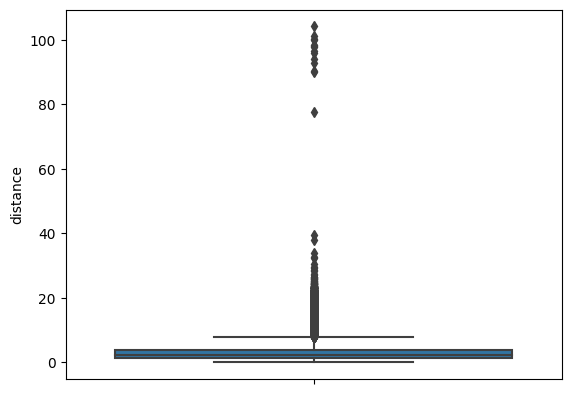

In [65]:
sns.boxplot(
data = train, y = 'distance')

In [66]:
train = train[train['distance'] < 40]

<Axes: xlabel='distance', ylabel='amount'>

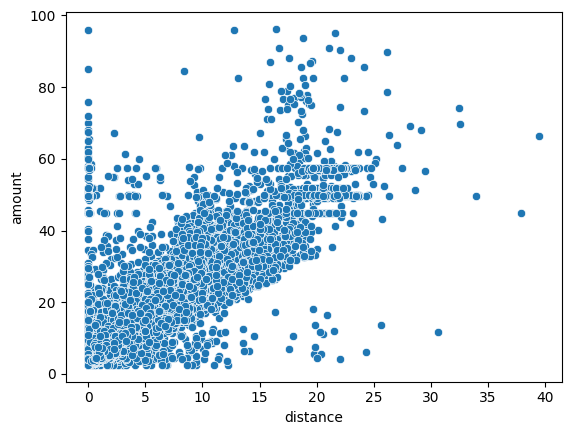

In [68]:
sns.scatterplot(data = train, x = 'distance', y = 'amount')

In [69]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [70]:
X = train.drop(['amount'],axis = 1)
y = train['amount']

In [71]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [72]:
dtrain = xgb.DMatrix(train_X, label = train_y)
dvalid = xgb.DMatrix(valid_X, label = valid_y)

In [73]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'verbosity': 0,
    'seed': 42
}

In [74]:
num_round = 100
model = xgb.train(params, dtrain, num_round)

In [75]:
y_pred = model.predict(dvalid)
mse = mean_squared_error(valid_y, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 15.1454179835095


In [76]:
test

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.029601
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.443441
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389132
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.795790
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.998338
...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,4.935469
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.873774
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2.260573
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,0.666621


In [77]:
test_X = test.drop(['amount'],axis = 1)
test_y = test['amount']

In [78]:
dtest = xgb.DMatrix(test_X)
y_pred = model.predict(dtest)

In [79]:
sub = pd.read_csv('/TaxiFare.csv')

In [81]:
submission = pd.DataFrame({'unique_id': sub['unique_id'], 'amount': y_pred})
submission.to_csv('submission.csv', index=False)

In [82]:
submission

,unique_id,amount
0,26:21.0,6.069294
1,52:16.0,21.164307
2,35:00.0,7.034556
3,30:42.0,10.091240
4,51:00.0,7.251416
...,...,...
49995,25:15.0,14.675609
49996,19:18.0,5.733681
49997,53:00.0,8.698874
49998,09:00.0,4.471420
